In [1]:
%run femshape/femshape.py
import numpy as np
import matplotlib.pyplot as pl

In [2]:
%matplotlib inline

In [3]:
%run femshape/utils

In [4]:
#scale = 1/np.sqrt(10)
scale = 1/10

## Compute representers for various orders and mesh sizes.

In [5]:
%%time
n = 5000
# Circle
#t=np.linspace(0,2*np.pi,n,endpoint=False)
#gamma1 = np.vstack((0.5*np.cos(t),0.5*np.sin(t))).T  
gamma1 = figure_of_eight(n).T
reps = [[Representer(Current(Space(order=o+1, meshsize=m,L=1), gamma1), scale=scale) for o in range(4)] for m in 2**np.arange(8)]
areps = np.array(reps)

CPU times: user 34.7 s, sys: 4.78 s, total: 39.5 s
Wall time: 30.5 s


Plot one of the representer.

In [6]:
areps.shape

(8, 4)

Text(0.5, 1.0, '$\\log_2$ meshsize: 1 - Order: 3')

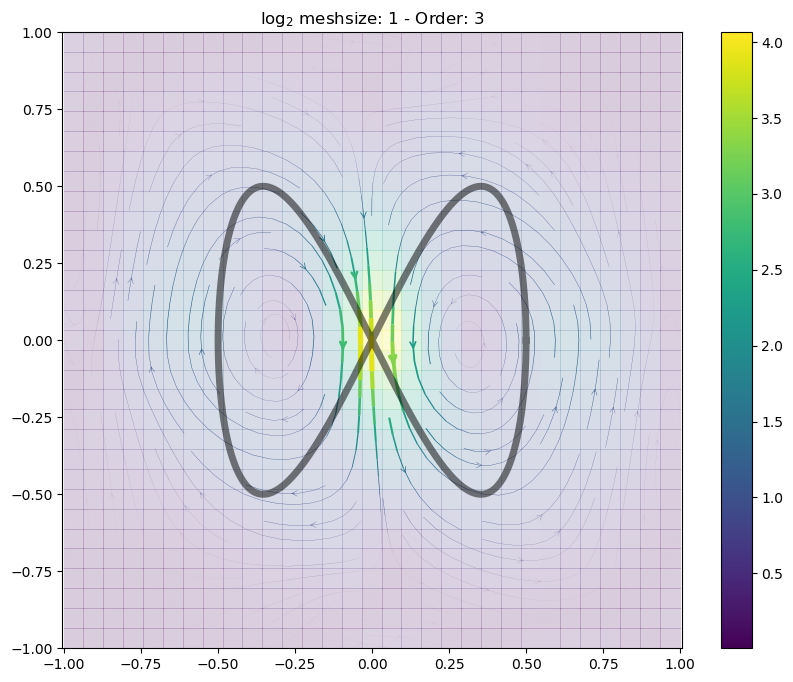

In [7]:
order = 3
log2mesh = 1
pl.figure(figsize=(10,8))
plot_representer(areps[log2mesh,order-1])
plt.title("$\log_2$ meshsize: {} - Order: {}".format(log2mesh, order))

Fetch the $H_1$ and $H_2$ norms for each representer.

In [8]:
import operator

In [9]:
error = np.stack([np.vectorize(operator.attrgetter(attr))(areps) for attr in ['H1_sq_norm', 'H2_sq_norm']], axis=-1)

In [10]:
error[0,0,0]

0.4336292342953473

## Save the computed errors

In [11]:
np.save('H_errors', error)

## Load the errors

In [12]:
error = np.load('H_errors.npy')

## Log plots of the errors

In [13]:
def order_format(i):
    return "order {}".format(i+1)

First, plot the square of the $H_1$ and $H_2$ norms depending on the order and mesh size.

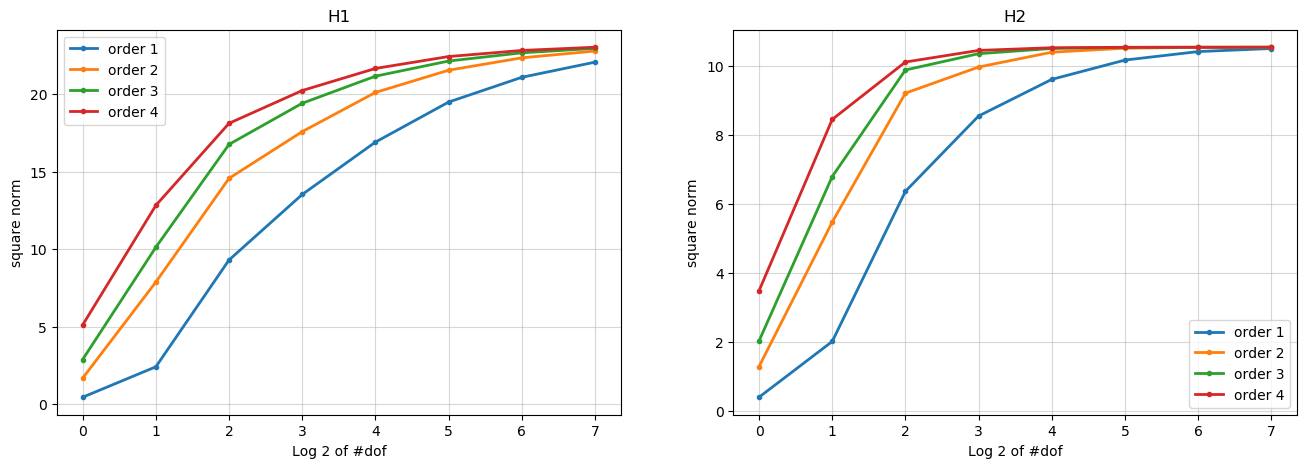

In [14]:
pl.figure(figsize=(16,5))
for i, title in enumerate(['H1', 'H2']):
    plt.subplot(1,2,i+1)
    for j in range(4):
        pl.plot(range(8),error[:,j,i], '.-', lw=2, label=order_format(j))
    pl.grid(alpha=.5)
    pl.legend()
    pl.title(title)
    pl.ylabel('square norm')
    pl.xlabel('Log 2 of #dof')
    

In [15]:
def log2_dof(order):
    return np.log2((order+2)*(order+3)/6.0)+np.arange(0,14,2)

Text(0.5, 1.0, 'square norm error depending on mesh size and order')

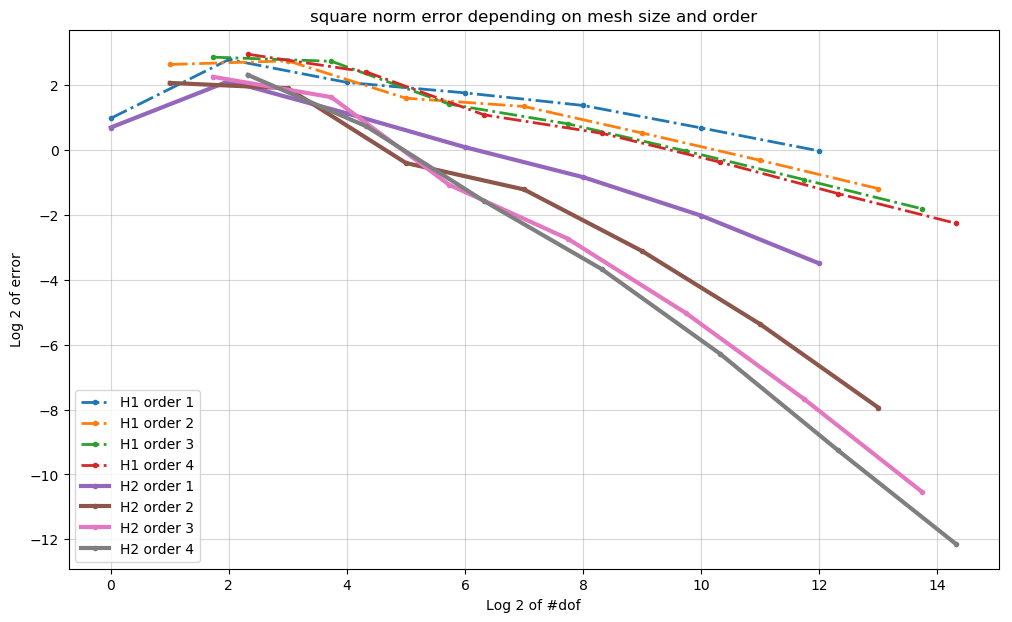

In [16]:
pl.figure(figsize=(12,7))
for j in range(2):
    for i in range(4):
        pl.plot(log2_dof(i),np.log2(error[1:,i,j] - error[:7,i,j]), lw=[2,3][j], marker='.', ls=['-.','-'][j], label="H{} {}".format(j+1, order_format(i)))
pl.legend()
pl.grid(alpha=.5)
pl.ylabel('Log 2 of error')
pl.xlabel('Log 2 of #dof')
pl.title('square norm error depending on mesh size and order')

In [17]:
error[1:,0,0]-error[:7,0,0]

array([1.96538235, 6.90278753, 4.23167654, 3.38367501, 2.58641202,
       1.60038475, 0.97891957])